In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *

In [2]:
# Usage
directory = './06262/'
filename = '06262_0_vd_00003-00004.edf'
image = read_esrf_edf_image(directory + filename)

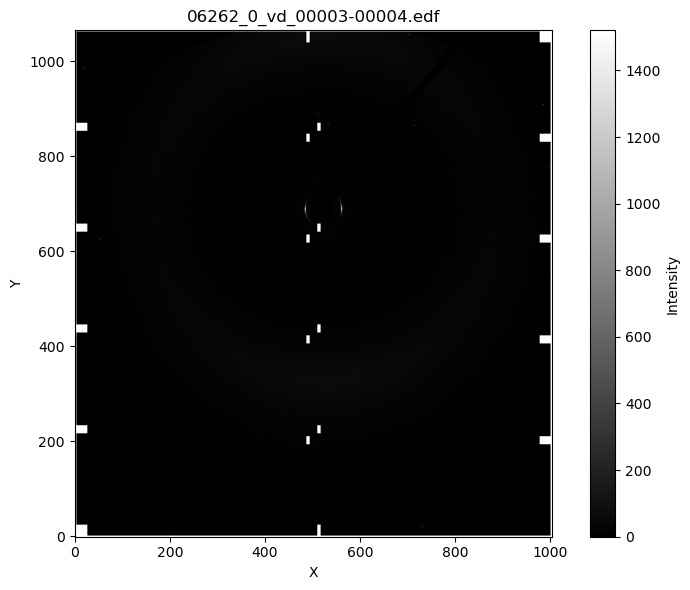

{'Center_1': 523.0, 'Center_2': 690.0, 'Dim_1': 1004.0, 'Dim_2': 1066.0, 'SampleDistance': 0.172, 'WaveLength': 1.54189e-10, 'PSize_1': 0.000172, 'PSize_2': 0.000172}


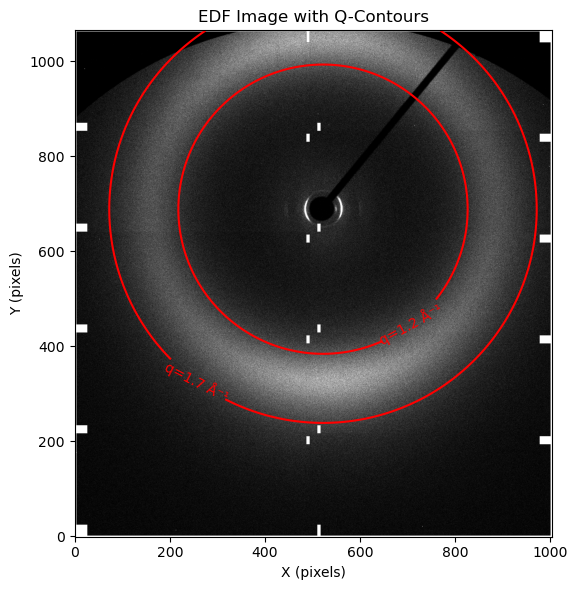

In [3]:
# Optional: scale contrast using percentiles
vmin, vmax = 0, 100
show_image(filename, image)

# Usage
params = extract_edf_parameters(directory + filename)
print(params)

Q, angle, Qx, Qy = create_qmap(params)
plot_image_with_q_contours(image, Q, q_levels=[1.2, 1.71], vmin=vmin, vmax=vmax)

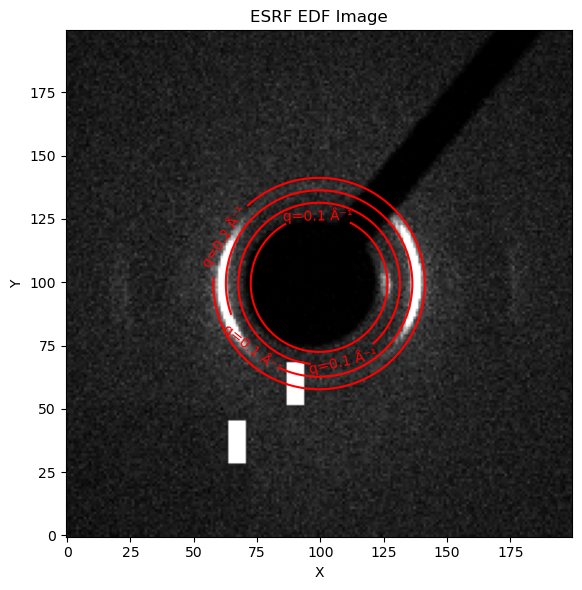

In [4]:
#check if the beam center is correct

vmin, vmax = 0, 100
qmap_filename = "qmap_output.npz"

xc = params["Center_1"] + 0.5
yc = params["Center_2"] + 0.5


Q, angle, Qx, Qy = create_qmap(params, xc = xc, yc = yc)
#np.savetxt(directory + 'beamcenter.txt', [xc, yc])
#beam center is saved in qmap
check_Qmap_center(image, params, Q, q_levels=[0.11, 0.13, 0.15, 0.17], vmin=vmin, vmax=vmax)
save_Qmaps(Q, angle, Qx, Qy, xc, yc, directory + qmap_filename)